In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import math

## Question 1

### Question 1.1

In [2]:
netflix = pd.read_csv('netflix_titles.csv',delimiter=',')
display(netflix)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
# Question 1.1.1
number_entries = netflix.shape[0]
print("Number of entries in this dataset is:",number_entries)
print()
print("Range/mean/max/etc of the variables\n",netflix.describe())
movies = netflix[netflix.type=='Movie']
unique,count = np.unique(movies['type'].values,return_counts=True)
print()
print("Number of unique movies:",count[0])
series = netflix[netflix.type=='TV Show']
unique2,count2 = np.unique(series['type'].values,return_counts=True)
print()
print("Number of unique series:",count2[0])
print()
print("Different ratings provided:",netflix['rating'].unique())
print()
print("Range of years:",netflix['release_year'].max() - netflix['release_year'].min())

Number of entries in this dataset is: 8807

Range/mean/max/etc of the variables
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Number of unique movies: 6131

Number of unique series: 2676

Different ratings provided: ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Range of years: 96


In [4]:
# Question 1.1.2
count = netflix.isna().sum()
print("Number of missing values per column:\n",count)
print()
duplicates = netflix.duplicated()
print("Duplicate rows listed below:\n",duplicates)
print()
number_of_duplicates = duplicates.sum()
print("Number of duplicate rows:",number_of_duplicates)

Number of missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Duplicate rows listed below:
 0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

Number of duplicate rows: 0


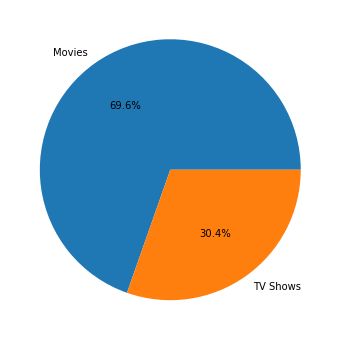

In [5]:
# Question 1.1.4
movies = netflix[netflix.type=='Movie']
series = netflix[netflix.type=='TV Show']

types = np.array([movies.shape[0],series.shape[0]])
labels = ["Movies","TV Shows"]

plt.figure(figsize=(6,6))
plt.pie(types,labels=labels,autopct='%1.1f%%')
plt.show()

Above we can see that the number of movies is more than double the number of tv shows listed in the netflix USA database.

<Figure size 864x864 with 0 Axes>

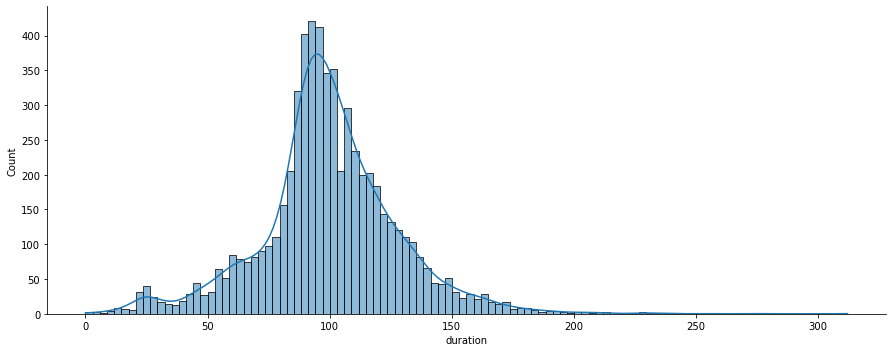

In [6]:
# Question 1.1.5
movies = netflix[netflix.type=='Movie']
series = netflix[netflix.type=='TV Show']

lenOfMovies = movies['duration']
lenOfMovies = lenOfMovies.fillna("0 min")

lenOfMovies = lenOfMovies.map(lambda x: x.rstrip('min')).astype(float)

number_of_seasons = series['duration']
number_of_seasons = number_of_seasons.fillna("0 Seasons")

number_of_seasons = number_of_seasons.map(lambda x: x.rstrip('Seasons')).astype(int)


plt.figure(figsize=(12,12))
sns.displot(lenOfMovies,kde=True,aspect=2.5)
plt.show()



<Figure size 864x864 with 0 Axes>

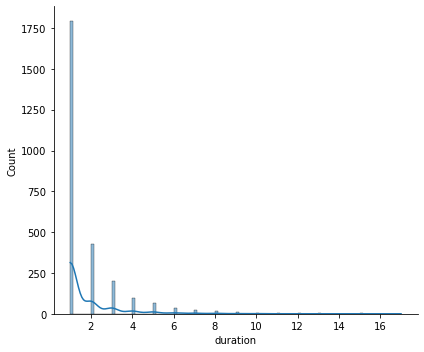

In [7]:
plt.figure(figsize=(12,12))
sns.displot(number_of_seasons,aspect=1.2,kde=True)
plt.show()

Above we can see the distribution of the movie durations highlighted in the first graph and the distribution of number of seasons is shown as a bar graph as the second plot. Many movies last about 100 minutes long and the number of seasons for most shows end at season 1 or 2 :(

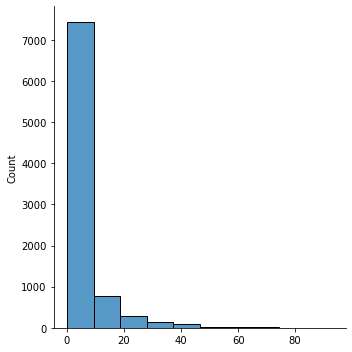

In [8]:
# Question 1.1.6 
Netflix_copy = netflix.copy()
Dates = Netflix_copy[["date_added","release_year"]]
Dates = Dates.dropna()
#display(Dates)
Dates['date_added'] = pd.to_datetime(Dates['date_added'])
Year_added = Dates['date_added'].dt.year.astype(int)
Created = Dates['release_year'].astype(int)

ans = Year_added - Created

ans = ans[ans>=0]

sns.displot(ans,bins=10)
plt.show()

Majority of content on netflix, we can see is released between 0-10 years after their release date. Netflix produced content can be identified by seeing whether the year the content was released and the year the content was added to netflix is equal to zero.

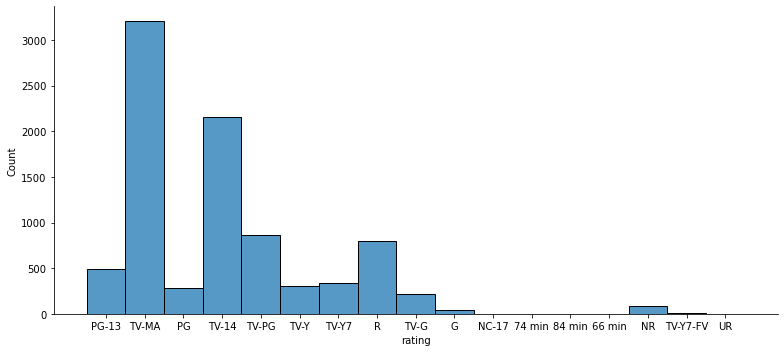

In [9]:
# Question 1.1.7
rating = netflix.copy()
sns.displot(rating['rating'].dropna(), aspect=2.2)
plt.show()

Majority of the ratings are PG-13 ratings and a small amount belong to NR and UR ratings.

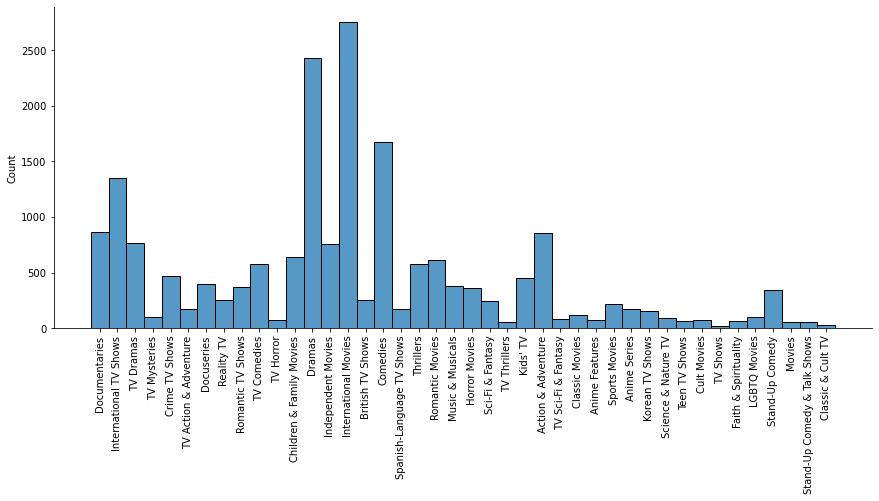

In [10]:
# Question 1.1.8
genre = netflix.copy()
temp = []
for i in range(genre.shape[0]):
    temp2 = genre.iloc[i]['listed_in'].split(", ")
    for j in temp2:
        temp.append(j)
genres = np.array(temp)
unique,count = np.unique(genres,return_counts=True)
genres = pd.Series(genres)
ax = sns.displot(genres, aspect=2.5)
ax.set_xticklabels(rotation=90)

The top 3 genres are :
* International movies
* Dramas
* Comedies

,date_added,type
0,"September 25, 2021",Movie
1,"September 24, 2021",TV Show
2,"September 24, 2021",TV Show
3,"September 24, 2021",TV Show
4,"September 24, 2021",TV Show
...,...,...
8802,"November 20, 2019",Movie
8803,"July 1, 2019",TV Show
8804,"November 1, 2019",Movie
8805,"January 11, 2020",Movie


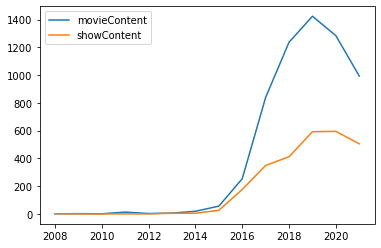

In [11]:
# Question 1.1.9
dates = netflix.copy()
dates = dates[["date_added","type"]]
dates = dates.dropna()
display(dates)
dates['date_added'] = pd.to_datetime(dates['date_added'])

movies = dates[dates.type=="Movie"]
show = dates[dates.type=="TV Show"]

Movie2008 = movies[movies.date_added.dt.year==2008]
Movie2009 = movies[movies.date_added.dt.year==2009]
Movie2010 = movies[movies.date_added.dt.year==2010]
Movie2011 = movies[movies.date_added.dt.year==2011]
Movie2012 = movies[movies.date_added.dt.year==2012]
Movie2013 = movies[movies.date_added.dt.year==2013]
Movie2014 = movies[movies.date_added.dt.year==2014]
Movie2015 = movies[movies.date_added.dt.year==2015]
Movie2016 = movies[movies.date_added.dt.year==2016]
Movie2017 = movies[movies.date_added.dt.year==2017]
Movie2018 = movies[movies.date_added.dt.year==2018]
Movie2019 = movies[movies.date_added.dt.year==2019]
Movie2020 = movies[movies.date_added.dt.year==2020]
Movie2021 = movies[movies.date_added.dt.year==2021]

Show2008 = show[show.date_added.dt.year==2008]
Show2009 = show[show.date_added.dt.year==2009]
Show2010 = show[show.date_added.dt.year==2010]
Show2011 = show[show.date_added.dt.year==2011]
Show2012 = show[show.date_added.dt.year==2012]
Show2013 = show[show.date_added.dt.year==2013]
Show2014 = show[show.date_added.dt.year==2014]
Show2015 = show[show.date_added.dt.year==2015]
Show2016 = show[show.date_added.dt.year==2016]
Show2017 = show[show.date_added.dt.year==2017]
Show2018 = show[show.date_added.dt.year==2018]
Show2019 = show[show.date_added.dt.year==2019]
Show2020 = show[show.date_added.dt.year==2020]
Show2021 = show[show.date_added.dt.year==2021]

movieContent = [len(Movie2008),len(Movie2009),len(Movie2010),len(Movie2011),len(Movie2012),len(Movie2013),len(Movie2014),len(Movie2015),len(Movie2016),len(Movie2017),len(Movie2018),len(Movie2019),len(Movie2020),len(Movie2021)]
showContent = [len(Show2008),len(Show2009),len(Show2010),len(Show2011),len(Show2012),len(Show2013),len(Show2014),len(Show2015),len(Show2016),len(Show2017),len(Show2018),len(Show2019),len(Show2020),len(Show2021)]
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

plt.plot(years, movieContent, label = "movieContent")
plt.plot(years, showContent, label = "showContent")
plt.legend()
plt.show()

Movies are added more regularly according to this graph which makes sense as you can watch a movie in one sitting whereas series require time and as such Netflix should have to be up to date with movies more often that series

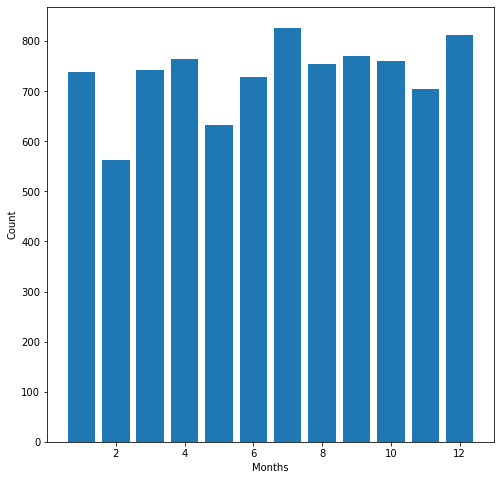

In [36]:
# Question 1.1.10 (Both months and days will be done below)
temp = netflix.copy()
temp["date_added"] = pd.to_datetime(temp['date_added'])
months = temp['date_added'].dt.month

tempMonth = months.value_counts()
plt.figure(figsize=(8,8))
plt.bar(tempMonth.index, tempMonth.values)
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

Some trend could be noticed as during holiday months more content is uploaded but this is only by a small difference.

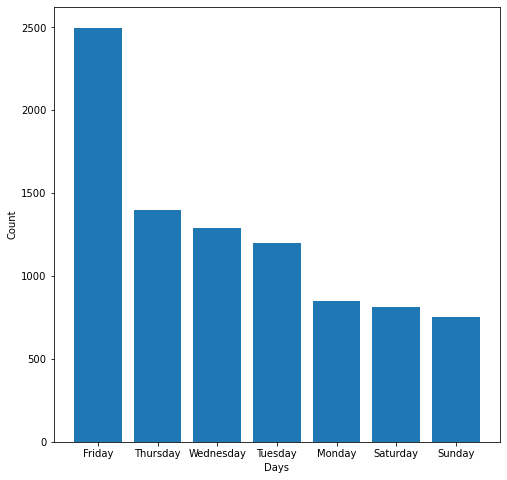

In [35]:
temp = netflix.copy()
temp["date_added"] = pd.to_datetime(temp['date_added'])
days = temp["date_added"].dt.day_name()

tempDay = days.value_counts()
plt.figure(figsize=(8,8))
plt.bar(tempDay.index, tempDay.values)
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

When looking at days of the week it is quite apparent that the most content is uploaded on a friday, or should i say FriYay!!!

### Question 1.2

In [13]:
# Question 1.2.1
basics = pd.read_csv('title.basics_small.tsv.gz', delimiter='\t')
ratings = pd.read_csv('title.ratings_small.tsv.gz', delimiter='\t')

In [14]:
netflix_copy = netflix.copy()
result = pd.merge(basics, ratings, on=["tconst"])
netflix_copy = netflix_copy[netflix_copy.type=="Movie"]

In [15]:
final = pd.merge(netflix_copy,result,left_on='title',right_on='primaryTitle')

In [16]:
final

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,0,89,"Documentary,Drama",7.4,5870
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,movie,My Little Pony: A New Generation,My Little Pony: A New Generation,0,2021,0,90,"Adventure,Animation,Comedy",6.9,2702
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,movie,Sankofa,Sankofa,0,1993,0,125,Drama,7.0,617
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,movie,The Starling,The Starling,0,2021,0,102,"Comedy,Drama",6.3,9145
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,movie,Je Suis Karl,Je Suis Karl,0,2021,0,126,"Drama,Romance,Thriller",5.4,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,short,Zoom,Zoom,0,2020,0,36,"Horror,Short,Thriller",5.7,18
13521,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
13522,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
13523,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,short,Zubaan,Zubaan,0,2018,0,25,"Crime,Drama,Short",8.0,10


No as certain movies have different genres for them and different time durations which makes no sense at all. This could appear due to the IMDB dataset containing multiple instances of the same movie but listed as a show or the same movie but made in different years.

In [17]:
# Question 1.2.2
basics2 = pd.read_csv('title.basics_small.tsv.gz', delimiter='\t')
ratings2 = pd.read_csv('title.ratings_small.tsv.gz', delimiter='\t')

netflix_copy2 = netflix.copy()
result2 = pd.merge(basics2, ratings2, on=["tconst"])
netflix_copy2 = netflix_copy2[netflix_copy2.type=="Movie"]

In [18]:
banned = ['Is','is','the','The','a','A','of','Of','and','And']
f = lambda x: ' '.join([item for item in x.split() if item not in banned])
result2['primaryTitle'] = result2['primaryTitle'].apply(f)
netflix_copy2['title'] = netflix_copy2['title'].apply(f)
final2 = pd.merge(netflix_copy2,result2,left_on='title',right_on='primaryTitle')

In [19]:
final2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,movie,Dick Johnson Dead,Dick Johnson Is Dead,0,2020,0,89,"Documentary,Drama",7.4,5870
1,s7,Movie,My Little Pony: New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,movie,My Little Pony: New Generation,My Little Pony: A New Generation,0,2021,0,90,"Adventure,Animation,Comedy",6.9,2702
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,movie,Sankofa,Sankofa,0,1993,0,125,Drama,7.0,617
3,s10,Movie,Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,movie,Starling,The Starling,0,2021,0,102,"Comedy,Drama",6.3,9145
4,s10,Movie,Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,short,Starling,Starling,0,2020,0,11,"Horror,Short,Thriller",8.4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16774,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,short,Zoom,Zoom,0,2020,0,36,"Horror,Short,Thriller",5.7,18
16775,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
16776,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,tvSeries,Zoom,Zoom,0,1997,0,30,"Comedy,Drama,Family",7.2,1150
16777,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,short,Zubaan,Zubaan,0,2018,0,25,"Crime,Drama,Short",8.0,10


The method i have chosen is to remove all strings such as the,and,of,etc and join on these renamed titles and as such the number of matches increased quite significantly from 13525 to 16779 rows

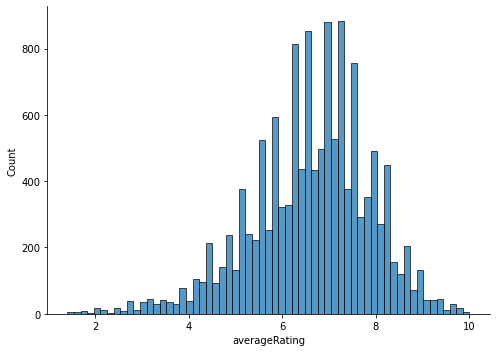

In [20]:
# Question 1.2.3
sns.displot(final.averageRating,aspect=1.4)

We can see Netflix has an average rating ranges between 6 and 8 which is quite good indicating it has a good quality library but its not great as the histogram is left tailed highlighting shows get lower ratings below 6rather than higher ratings above 8

In [21]:
# Question 1.2.4

### Question 1.3

In [22]:
# Question 1.3.1
netflix_copy = netflix.copy()
netflix_copy_movie = netflix_copy[netflix_copy.type=="Movie"]
print("The number of missing directors:",netflix_copy_movie['director'].isna().sum())

The number of missing directors: 188


In [23]:
# Question 1.3.2
data = netflix_copy_movie['director'].copy().dropna()

temp = []
for i in range(data.shape[0]):
    curr = data.iloc[i].split(", ")
    for j in curr: 
        temp.append(j)

directors = pd.Series(temp).value_counts()
display(directors)

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Jay Karas         15
                  ..
Will Becher        1
Gary Cohen         1
Julien Seri        1
Shrihari Sathe     1
Matt Toronto       1
Length: 4777, dtype: int64

In [24]:
crew = pd.read_csv('title.crew_small.tsv.gz', delimiter='\t')
name = pd.read_csv('name.basics_small.tsv.gz', delimiter='\t')
dirs = pd.merge(crew,name,left_on='directors',right_on='nconst')

In [25]:
dirs

,tconst,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000004,nm0721526,\N,nm0721526,Émile Reynaud,1844,1918,"director,animation_department,writer","tt2184231,tt0000003,tt13125956,tt2184201"
1,tt0000020,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
2,tt0229648,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
3,tt0282172,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
4,tt1199694,nm0010291,\N,nm0010291,Birt Acres,1854,1918,"cinematographer,director,producer","tt0282161,tt0000025,tt0000020,tt0000024"
...,...,...,...,...,...,...,...,...,...
85402,tt9905412,nm10533890,nm10533895,nm10533890,Zam,\N,\N,director,\N
85403,tt9909920,nm2615138,\N,nm2615138,Thomas Winston,\N,\N,"producer,cinematographer,director","tt1749605,tt3076808"
85404,tt9910628,nm10536092,nm10536092,nm10536092,Daisy Leigh-Phippard,\N,\N,"script_department,writer,director","tt10098886,tt4123432,tt9132428,tt9910628"
85405,tt9915946,nm0652213,nm0652213,nm0652213,Luis Ospina,1949,2019,"director,writer,editor","tt1244730,tt0193438,tt0381135,tt0212522"


In [26]:
finalDirectors = pd.merge(final,dirs,left_on='tconst',right_on='tconst')

In [27]:
finalDirectors

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,directors,writers,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,7.4,5870,nm0990310,"nm1637105,nm0990310",nm0990310,Kirsten Johnson,\N,\N,"cinematographer,camera_department,producer","tt6328110,tt5375040,tt11394180,tt0390190"
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,7.0,617,nm0314340,nm0314340,nm0314340,Haile Gerima,1946,\N,"director,producer,writer","tt0083584,tt0108041,tt0073394,tt1284592"
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,6.3,9145,nm0577647,nm1358798,nm0577647,Theodore Melfi,1970,\N,"producer,director,writer","tt4846340,tt2170593,tt6018012,tt2568862"
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,5.4,613,nm2275000,nm0920910,nm2275000,Christian Schwochow,1978,\N,"director,writer,actor","tt1176699,tt5765988,tt1717152,tt6258718"
4,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,...,5.2,639,nm3061960,"nm3061960,nm0513106,nm12833828,nm5095403",nm3061960,Bruno Garotti,\N,\N,"assistant_director,writer,director","tt0800080,tt10329566,tt4634200,tt8716800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11370,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,4.4,20545,nm0382072,"nm0726472,nm1183854,nm0504670",nm0382072,Peter Hewitt,1962,\N,"director,writer,producer","tt0101452,tt0215591,tt0356634,tt0283054"
11371,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,5.7,18,nm11462931,nm10578702,nm11462931,Matthew Landford,\N,\N,director,"tt12171626,tt12062078"
11372,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,5.7,18,nm11462931,nm10578702,nm11462931,Matthew Landford,\N,\N,director,"tt12171626,tt12062078"
11373,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,8.0,10,nm9269619,nm9269619,nm9269619,Ojaswwee Sharma,\N,\N,"writer,director,cinematographer","tt11259700,tt7506628,tt11226108,tt8946762"


In [28]:
p = final.copy()
data = p['director'].copy().dropna()

temp = []
for i in range(data.shape[0]):
    curr = data.iloc[i].split(", ")
    for j in curr: 
        temp.append(j)

directors = pd.Series(temp).value_counts()
display(directors)

Youssef Chahine           91
Anton Corbijn             54
John G. Avildsen          53
Anees Bazmee              53
Onir                      47
                          ..
Houssam El-Din Mustafa     1
Gayane Petrosyan           1
Advait Chandan             1
Bronwen Hughes             1
Magdy Al-Hawwary           1
Length: 4068, dtype: int64

Originally Rajiv Chilaka has the most titles but after filling in the missing data we can see that Youssef Chahine has the most titles.

In [29]:
# Question 1.3.3
temp = directors[directors>3]

In [31]:
maxRating = final["averageRating"].max()
johnRating = final[final.director=="Youssef Chahine"]
johnValue = johnRating.averageRating
johnValue = johnValue.sum()
johnValue /= johnRating.shape[0]
print("Max rating is:",maxRating)
print()
print("John rating is:",johnValue)

Max rating is: 10.0

John rating is: 6.84065934065934


We see that Youssefs rating isnt the best rating from the above calculation despite appearing the most in the dataset